In [177]:
''''
TOP 20 features that have a high mutual info score w/ arousal:
INDEX 0 : adjective_count SCORE: 0.05082632896920991
INDEX 1 : num_words SCORE: 0.04876484449326757
INDEX 2 : num_5grams SCORE: 0.04837045280215513
INDEX 3 : num_4grams SCORE: 0.04821393048227751
INDEX 4 : num_unique_bigrams SCORE: 0.047744072700954376
INDEX 5 : num_unique_trigrams SCORE: 0.04765633572761274
INDEX 6 : num_unique_5grams SCORE: 0.04755501286334418
INDEX 7 : num_trigrams SCORE: 0.047505371216749026
INDEX 8 : number_lines SCORE: 0.04738084578128987
INDEX 9 : num_bigrams SCORE: 0.046992205977806734
INDEX 10 : non3rdpersonsingularpresent_verb_count SCORE: 0.04570499626396973
INDEX 11 : num_unique_4grams SCORE: 0.04524936674246405
INDEX 12 : noun_count SCORE: 0.042097992805620876
INDEX 13 : base_verb_count SCORE: 0.03753682045568851
INDEX 14 : TOTAL_verb_count SCORE: 0.03736745136731923
INDEX 15 : content_density SCORE: 0.03458158557082136
INDEX 16 : pastparticiple_verb_freq SCORE: 0.032048842533438204
INDEX 17 : personal_pronoun_count SCORE: 0.03104155923545271
INDEX 18 : 3rdpersonsingularpresent_verb_count SCORE: 0.02365818734652958
INDEX 19 : coordinating_conjunctions_freq SCORE: 0.020881204698388167
INDEX 20 : preposition_count SCORE: 0.020388547792320466


Features we want to compute:
-word count
-number of lines
-content density (type-token ratio)

-number of unique bigrams
-number of 4-grams
-number of 5-grams
-number of unique 5-grams

-adjective_count
-noun_count
-base_verb_count
-TOTAL_verb_count
-preposition_count
-personal_pronoun_count

-non3rdpersonsingularpresent_verb_count
-3rdpersonsingularpresent_verb_count

-coordinating_conjunctions_freq
-pastparticiple_verb_freq


'''

"'\nTOP 20 features that have a high mutual info score w/ arousal:\nINDEX 0 : adjective_count SCORE: 0.05082632896920991\nINDEX 1 : num_words SCORE: 0.04876484449326757\nINDEX 2 : num_5grams SCORE: 0.04837045280215513\nINDEX 3 : num_4grams SCORE: 0.04821393048227751\nINDEX 4 : num_unique_bigrams SCORE: 0.047744072700954376\nINDEX 5 : num_unique_trigrams SCORE: 0.04765633572761274\nINDEX 6 : num_unique_5grams SCORE: 0.04755501286334418\nINDEX 7 : num_trigrams SCORE: 0.047505371216749026\nINDEX 8 : number_lines SCORE: 0.04738084578128987\nINDEX 9 : num_bigrams SCORE: 0.046992205977806734\nINDEX 10 : non3rdpersonsingularpresent_verb_count SCORE: 0.04570499626396973\nINDEX 11 : num_unique_4grams SCORE: 0.04524936674246405\nINDEX 12 : noun_count SCORE: 0.042097992805620876\nINDEX 13 : base_verb_count SCORE: 0.03753682045568851\nINDEX 14 : TOTAL_verb_count SCORE: 0.03736745136731923\nINDEX 15 : content_density SCORE: 0.03458158557082136\nINDEX 16 : pastparticiple_verb_freq SCORE: 0.032048842

In [42]:
! pip install textblob

In [30]:
! pip install pandas

In [195]:
! pip install pygal

  Obtaining dependency information for pygal from https://files.pythonhosted.org/packages/29/83/94e10cdc24489caef1ffcf9c3c2836fc35eff0f1c1d60d609d55d449820c/pygal-3.0.4-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/130.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/130.4 kB ? eta -:--:--
   --------- ----------------------------- 30.7/130.4 kB 445.2 kB/s eta 0:00:01
   ------------------------------------- -- 122.9/130.4 kB 1.0 MB/s eta 0:00:01
   ---------------------------------------- 130.4/130.4 kB 1.1 MB/s eta 0:00:00


In [178]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\larae\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [238]:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

In [239]:
# Define the functions
def wordcount(text):
    words = text.split()
    return len(words)

def lines(text):
    res = ""
    for i in text:
        if(i.isupper()):
            res+="*"+i
        else:
            res+=i
    m=res.split("*")
    m.remove('')
    numlines = len(m)
    return numlines

def type_token_ratio(text):
    words = text.split()
    unique_words = set(words)
    ttr = len(unique_words) / len(words) if words else 0
    return ttr

def ngrams(text, n):
    vectorizer = CountVectorizer(ngram_range=(n, n))
    analyzer = vectorizer.build_analyzer()
    n_grams = analyzer(text)
    return len(n_grams)

def unique_ngrams(text, n):
    vectorizer = CountVectorizer(ngram_range=(n, n))
    analyzer = vectorizer.build_analyzer()
    n_grams = analyzer(text)
    return len(set(n_grams))

def wordclass(text, category):
    blob = TextBlob(text)
    tags = blob.tags
    
    counts = {
        'adjective': 0,
        'noun': 0,
        'base_verb': 0,
        'total_verb': 0,
        'preposition': 0,
        'personal_pronoun': 0,
        'non3rdpersonsingularpresent_verb': 0,
        '3rdpersonsingularpresent_verb': 0,
        'past_participle_verb': 0,
        'coordinating_conjunctions': 0
    }
    
    for word, tag in tags:
        if tag in ['NN', 'NNS', 'NNP', 'NNPS']:
            counts['noun'] += 1
        elif tag == 'IN':
            counts['preposition'] += 1
        elif tag == 'VB':
            counts['base_verb'] += 1
            counts['total_verb'] += 1
        elif tag in ['VBD', 'VBG']:
            counts['total_verb'] += 1
        elif tag == 'VBN':
            counts['total_verb'] += 1
            counts['past_participle_verb'] += 1
        elif tag == 'VBP':
            counts['non3rdpersonsingularpresent_verb'] += 1
            counts['total_verb'] += 1
        elif tag == 'VBZ':
            counts['3rdpersonsingularpresent_verb'] += 1
            counts['total_verb'] += 1
        elif tag in ['JJ', 'JJR', 'JJS']:
            counts['adjective'] += 1
        elif tag == 'CC':
            counts['coordinating_conjunctions'] += 1
        elif tag == 'PRP':
            counts['personal_pronoun'] += 1
    
    content_density = (counts['total_verb'] + counts['noun'] + counts['adjective']) / wordcount(text)
    past_participle_verb_freq = counts['past_participle_verb'] / wordcount(text)
    coordinating_conjunctions_freq = counts['coordinating_conjunctions'] / wordcount(text)
    
    counts['content_density'] = content_density
    counts['past_participle_verb_freq'] = past_participle_verb_freq
    counts['coordinating_conjunctions_freq'] = coordinating_conjunctions_freq
    
    return counts[category]




In [240]:
# Input lyrics
lyrics = input("Please copy-paste the lyrics to your favourite song!")



Please copy-paste the lyrics to your favourite song!Look at you, look at you,look at you,look at you,look at you,look at you,look at you,look at you,look at you,look at you,look at you,look at you,look at you,look at you,look at you,look at you.And I always find, yeah, I always find somethin' wrong You been puttin' up with' my shit just way too long I'm so gifted at findin' what I don't like the most So I think it's time for us to have a toast  Let's have a toast for the douchebags, Let's have a toast for the assholes, Let's have a toast for the scumbags, Every one of them that I know Let's have a toast to the jerkoffs That'll never take work off Baby, I got a plan Run away fast as you can  She find pictures in my email I sent this girl a picture of my dick. I don't know what it is with females But I'm not too good with that shit. See, I could have me a good girl And still be addicted to them hoodrats And I just blame everything on you At least you know that's what I'm good at  See, I 

In [243]:
# Calculate required values
num_words = wordcount(lyrics)
number_lines = lines(lyrics)
content_density = type_token_ratio(lyrics)
num_5grams = ngrams(lyrics, 5)
num_unique_5grams = unique_ngrams(lyrics, 5)
num_4grams = ngrams(lyrics, 4)
num_unique_4grams = unique_ngrams(lyrics, 4)
num_trigrams = ngrams(lyrics, 3)
num_unique_trigrams = unique_ngrams(lyrics, 3)
num_bigrams = ngrams(lyrics, 2)
num_unique_bigrams = unique_ngrams(lyrics, 2)

adjective_count = wordclass(lyrics, 'adjective')
noun_count = wordclass(lyrics, 'noun')
base_verb_count = wordclass(lyrics, 'base_verb')
preposition_count = wordclass(lyrics, 'preposition')
personal_pronoun_count = wordclass(lyrics, 'personal_pronoun')
non3rdpersonsingularpresent_verb_count = wordclass(lyrics, 'non3rdpersonsingularpresent_verb')
thirdpersonsingularpresent_verb_count = wordclass(lyrics, '3rdpersonsingularpresent_verb')
TOTAL_verb_count = wordclass(lyrics, 'total_verb')
past_participle_verb_freq = wordclass(lyrics, 'past_participle_verb_freq')
coordinating_conjunctions_freq = wordclass(lyrics, 'coordinating_conjunctions_freq')

# Initialize dictionary
result_dict = {
    "num_words": num_words,
    "number_lines": number_lines,
    "content_density": content_density,
    "num_5grams": num_5grams,
    "num_unique_5grams": num_unique_5grams,
    "num_4grams": num_4grams,
    "num_unique_4grams": num_unique_4grams,
    "num_trigrams": num_trigrams,
    "num_unique_trigrams": num_unique_trigrams,
    "num_bigrams": num_bigrams,
    "num_unique_bigrams": num_unique_bigrams,
    "adjective_count": adjective_count,
    "noun_count": noun_count,
    "base_verb_count": base_verb_count,
    "preposition_count": preposition_count,
    "personal_pronoun_count": personal_pronoun_count,
    "non3rdpersonsingularpresent_verb_count": non3rdpersonsingularpresent_verb_count,
    "thirdpersonsingularpresent_verb_count": thirdpersonsingularpresent_verb_count,
    "TOTAL_verb_count": TOTAL_verb_count,
    "past_participle_verb_freq": past_participle_verb_freq,
    "coordinating_conjunctions_freq": coordinating_conjunctions_freq
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame([result_dict])

# Print the DataFrame
print(df)

   num_words  number_lines  content_density  num_5grams  num_unique_5grams  \
0        592           113         0.342905         550                340   

   num_4grams  num_unique_4grams  num_trigrams  num_unique_trigrams  \
0         551                331           552                  321   

   num_bigrams  ...  adjective_count  noun_count  base_verb_count  \
0          553  ...               23         129               62   

   preposition_count  personal_pronoun_count  \
0                 76                      96   

   non3rdpersonsingularpresent_verb_count  \
0                                      34   

   thirdpersonsingularpresent_verb_count  TOTAL_verb_count  \
0                                      9               126   

   past_participle_verb_freq  coordinating_conjunctions_freq  
0                   0.015203                        0.016892  

[1 rows x 21 columns]


In [244]:
df.head()

,num_words,number_lines,content_density,num_5grams,num_unique_5grams,num_4grams,num_unique_4grams,num_trigrams,num_unique_trigrams,num_bigrams,...,adjective_count,noun_count,base_verb_count,preposition_count,personal_pronoun_count,non3rdpersonsingularpresent_verb_count,thirdpersonsingularpresent_verb_count,TOTAL_verb_count,past_participle_verb_freq,coordinating_conjunctions_freq
0,592,113,0.342905,550,340,551,331,552,321,553,...,23,129,62,76,96,34,9,126,0.015203,0.016892


In [245]:
'''
Best modeltype/hyperparameters for predicting arousal
w/ traditional language model

Estimator: GradientBoostingRegressor
Mean absolute error: 0.8101
Hyperparameters: 
criterion - squared error
learning rate - 0.1
loss - absolute_error
minimum samples per leaf - 10
number of estimators - 200
'''


'\nBest modeltype/hyperparameters for predicting arousal\nw/ traditional language model\n\nEstimator: GradientBoostingRegressor\nMean absolute error: 0.8101\nHyperparameters: \ncriterion - squared error\nlearning rate - 0.1\nloss - absolute_error\nminimum samples per leaf - 10\nnumber of estimators - 200\n'

In [246]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Load the training and validation data
train = pd.read_csv('TRAIN language data.csv', delimiter=';')
validate = pd.read_csv('VAL language data.csv', delimiter=';')

# Combine the train and validate data
train_validate = pd.concat([train, validate], ignore_index=True, sort=False)

# Define the relevant features
features = [
    'adjective_count', 'num_words', 'num_5grams', 'num_4grams',
    'num_unique_bigrams', 'num_unique_trigrams', 'num_unique_5grams',
    'num_trigrams', 'number_lines', 'num_bigrams',
    'non3rdpersonsingularpresent_verb_count', 'num_unique_4grams',
    'noun_count', 'base_verb_count', 'TOTAL_verb_count', 'content_density',
    'personal_pronoun_count','coordinating_conjunctions_freq',
    'preposition_count'
]

# Extract the relevant features and target variable
X = train_validate[features].applymap(lambda x: str(x).replace(',', '.')).astype(float)
y = train_validate['arousal_tags'].apply(lambda x: str(x).replace(',', '.')).astype(float)

# Replace inf, -inf, and NaN with 0
X = X.replace((np.inf, -np.inf, np.nan), 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the GradientBoostingRegressor model
model = GradientBoostingRegressor(
    criterion='squared_error',
    learning_rate=0.1,
    loss='absolute_error',
    min_samples_leaf=10,
    n_estimators=200,
    random_state=42
)

In [247]:
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Function to predict arousal on new data
def predict_arousal(new_data):
    new_data = new_data[features].applymap(lambda x: str(x).replace(',', '.')).astype(float)
    new_data = new_data.replace((np.inf, -np.inf, np.nan), 0)
    prediction = model.predict(new_data)
    return prediction

Mean Absolute Error: 0.8146712074555084


In [249]:
#df = df[top_18_features].replace((np.inf, -np.inf, np.nan), 0)

# Make predictions on new data
new_predictions = predict_arousal(df)
print("Predictions on new data:", new_predictions)

Predictions on new data: [5.30794265]


In [250]:
'''
Ranges from 1-7, but a high percentage of values are between 3.5 - 5.5

Low arousal: calm/relaxing <- 4

Moderate arousal: upbeat/rhythmic 4-5

High Arousal: exciting/energetic 5 ->

'''



'\nRanges from 1-7, but a high percentage of values are between 3.5 - 5.5\n\nLow arousal: calm/relaxing <- 4\n\nModerate arousal: upbeat/rhythmic 4-5\n\nHigh Arousal: exciting/energetic 5 ->\n\n'

In [251]:
import math

In [252]:
percentage =  round((new_predictions[0]/7)*100,1)


if new_predictions < 4:
    print("This song has a low arousal rating of",str(percentage), "%.")
    print("This rating suggests that it is calm and relaxing.")
    colour = 'lightblue'
elif new_predictions >= 4 and new_predictions <=5:
    print("This song has a moderate arousal rating of", str(percentage), "%.")
    print("This rating suggests that it is upbeat and rhythimical.")
    colour = 'lightgreen'
else:
    print("This song has a high arousal rating of", str(percentage), "%.")
    print("This rating suggests that it is exciting and energetic.")
    colour = 'orange'
    

This song has a high arousal rating of 75.8 %.
This rating suggests that it is exciting and energetic.


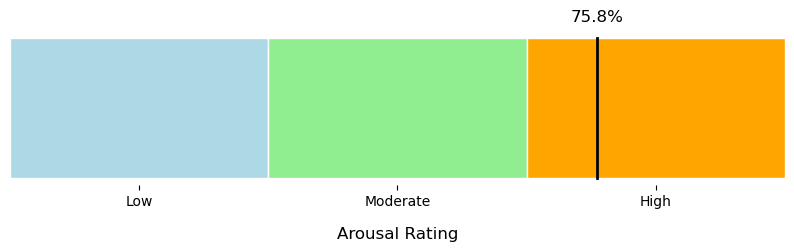

In [253]:
import matplotlib.pyplot as plt


arousal_rating = percentage


fig, ax = plt.subplots(figsize=(10, 2))


sections = ['Low', 'Moderate', 'High']
colors = ['lightblue', 'lightgreen', 'orange']
positions = [0, 33.33, 66.66, 100]  #


for i in range(len(sections)):
    ax.barh(0, positions[i + 1] - positions[i], left=positions[i], color=colors[i], edgecolor='white', height=1.0)

#Needle
needle_position = arousal_rating
ax.plot([needle_position, needle_position], [-0.5, 0.5], color='black', linewidth=2)
ax.text(needle_position, 0.65, f'{arousal_rating}%', horizontalalignment='center', verticalalignment='center', color='black', fontsize=12)

#Labels
label_positions = [(positions[i] + positions[i + 1]) / 2 for i in range(len(sections))]
ax.set_yticks([])
ax.set_xlim(0, 100)
ax.set_xticks(label_positions)
ax.set_xticklabels(sections)


for spine in ax.spines.values():
    spine.set_visible(False)

plt.title('Arousal Rating',y=-0.4)
plt.show()

In [255]:
import pygal
from pygal.style import Style


custom_style = Style(
        value_font_size=50,
        value_colors=('black'),  
        label_font_size=0,  
)

gauge = pygal.SolidGauge(
        half_pie=True,
        inner_radius=0.70,
        show_legend=False,
        style=custom_style
)
gauge.add('', [{'value': percentage, 'max_value': 100, 'color': colour}])
gauge.render_in_browser()

file://C:/Users/larae/AppData/Local/Temp/tmp98hbmbrq.html
